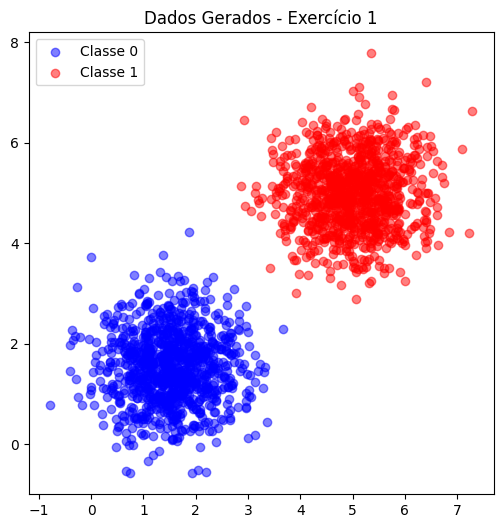

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definições
np.random.seed(42)  # reprodutibilidade
n_samples = 1000

# Classe 0
mean0 = [1.5, 1.5]
cov0 = [[0.5, 0], [0, 0.5]]
class0 = np.random.multivariate_normal(mean0, cov0, n_samples)

# Classe 1
mean1 = [5, 5]
cov1 = [[0.5, 0], [0, 0.5]]
class1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Labels
y0 = -1 * np.ones(n_samples)  # perceptron usa -1/+1
y1 = +1 * np.ones(n_samples)

# Concatenar dataset
X = np.vstack((class0, class1))
y = np.hstack((y0, y1))

# Visualizar
plt.figure(figsize=(6,6))
plt.scatter(class0[:,0], class0[:,1], color='blue', alpha=0.5, label='Classe 0')
plt.scatter(class1[:,0], class1[:,1], color='red', alpha=0.5, label='Classe 1')
plt.legend()
plt.title("Dados Gerados - Exercício 1")
plt.show()



In [2]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        self.history = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                linear_output = np.dot(self.w, xi) + self.b
                y_pred = np.sign(linear_output)

                if y_pred == 0:  # em caso raro de 0
                    y_pred = 1

                if yi != y_pred:
                    # atualização
                    self.w += self.lr * yi * xi
                    self.b += self.lr * yi
                    errors += 1

            acc = 1 - errors / n_samples
            self.history.append(acc)

            if errors == 0:  # convergiu
                break
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)



In [3]:
perceptron = Perceptron(lr=0.01, epochs=100)
perceptron.fit(X, y)

y_pred = perceptron.predict(X)
accuracy = np.mean(y_pred == y)

print("Pesos finais:", perceptron.w)
print("Bias final:", perceptron.b)
print("Acurácia final:", accuracy)


Pesos finais: [0.01985622 0.01711828]
Bias final: -0.11999999999999998
Acurácia final: 1.0


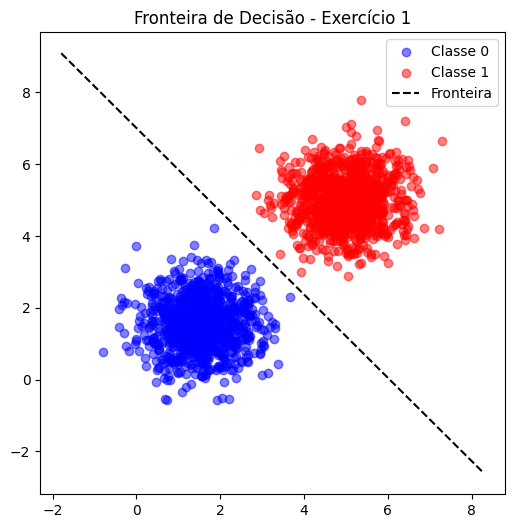

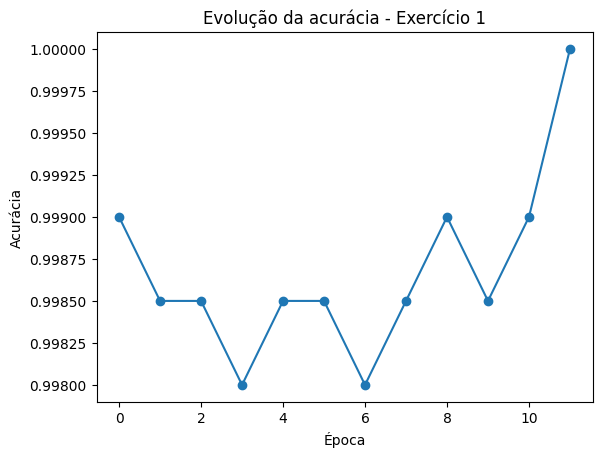

In [4]:
# Fronteira: w1*x1 + w2*x2 + b = 0
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx = np.linspace(x_min, x_max, 100)
yy = -(perceptron.w[0] * xx + perceptron.b) / perceptron.w[1]

plt.figure(figsize=(6,6))
plt.scatter(class0[:,0], class0[:,1], color='blue', alpha=0.5, label='Classe 0')
plt.scatter(class1[:,0], class1[:,1], color='red', alpha=0.5, label='Classe 1')
plt.plot(xx, yy, 'k--', label='Fronteira')
plt.legend()
plt.title("Fronteira de Decisão - Exercício 1")
plt.show()

# Curva de aprendizado
plt.plot(range(len(perceptron.history)), perceptron.history, marker='o')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Evolução da acurácia - Exercício 1")
plt.show()


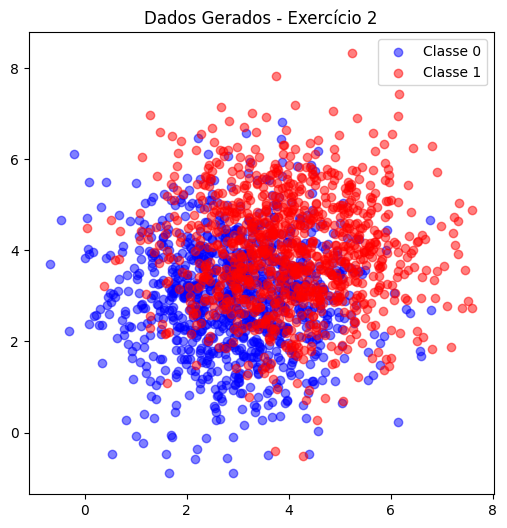

In [5]:
# Classe 0
mean0 = [3, 3]
cov0 = [[1.5, 0], [0, 1.5]]
class0 = np.random.multivariate_normal(mean0, cov0, n_samples)

# Classe 1
mean1 = [4, 4]
cov1 = [[1.5, 0], [0, 1.5]]
class1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Labels
y0 = -1 * np.ones(n_samples)
y1 = +1 * np.ones(n_samples)

X2 = np.vstack((class0, class1))
y2 = np.hstack((y0, y1))

# Visualizar
plt.figure(figsize=(6,6))
plt.scatter(class0[:,0], class0[:,1], color='blue', alpha=0.5, label='Classe 0')
plt.scatter(class1[:,0], class1[:,1], color='red', alpha=0.5, label='Classe 1')
plt.legend()
plt.title("Dados Gerados - Exercício 2")
plt.show()


In [6]:
perceptron2 = Perceptron(lr=0.01, epochs=100)
perceptron2.fit(X2, y2)

y_pred2 = perceptron2.predict(X2)
accuracy2 = np.mean(y_pred2 == y2)

print("Pesos finais:", perceptron2.w)
print("Bias final:", perceptron2.b)
print("Acurácia final:", accuracy2)


Pesos finais: [0.03621038 0.03127034]
Bias final: -0.019999999999999997
Acurácia final: 0.5005


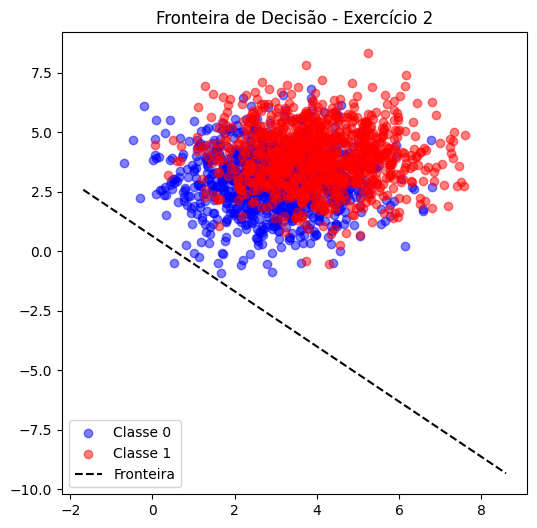

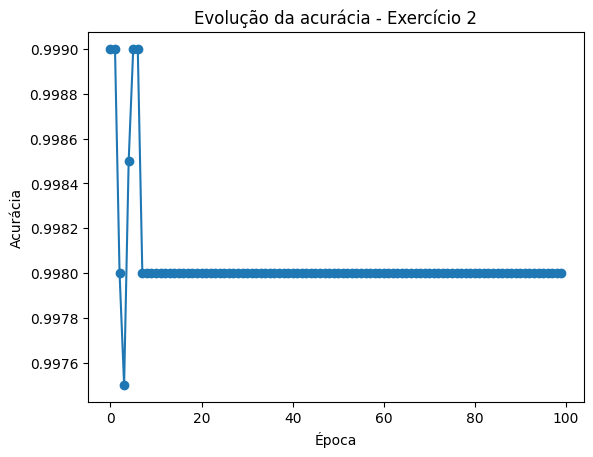

In [7]:
xx = np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 100)
yy = -(perceptron2.w[0] * xx + perceptron2.b) / perceptron2.w[1]

plt.figure(figsize=(6,6))
plt.scatter(class0[:,0], class0[:,1], color='blue', alpha=0.5, label='Classe 0')
plt.scatter(class1[:,0], class1[:,1], color='red', alpha=0.5, label='Classe 1')
plt.plot(xx, yy, 'k--', label='Fronteira')
plt.legend()
plt.title("Fronteira de Decisão - Exercício 2")
plt.show()

# Curva de aprendizado
plt.plot(range(len(perceptron2.history)), perceptron2.history, marker='o')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Evolução da acurácia - Exercício 2")
plt.show()
